# Spam Sms Detection:

Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, or Support Vector
Machines to identify spam messages

# Import necessary libraries

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Load the dataset

In [29]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset

In [30]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Display information about the dataset

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Drop unnecessary columns

In [32]:
data = data.drop(columns=data.columns[2:5])

# Rename columns for clarity

In [33]:
data.columns = ['Category', 'Message']

# Display the first few rows after modification

In [34]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Check for missing values

In [35]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

# Visualize the distribution of spam and legitimate messages with a pie chart

Text(0.5, 1.0, 'Category Distribution')

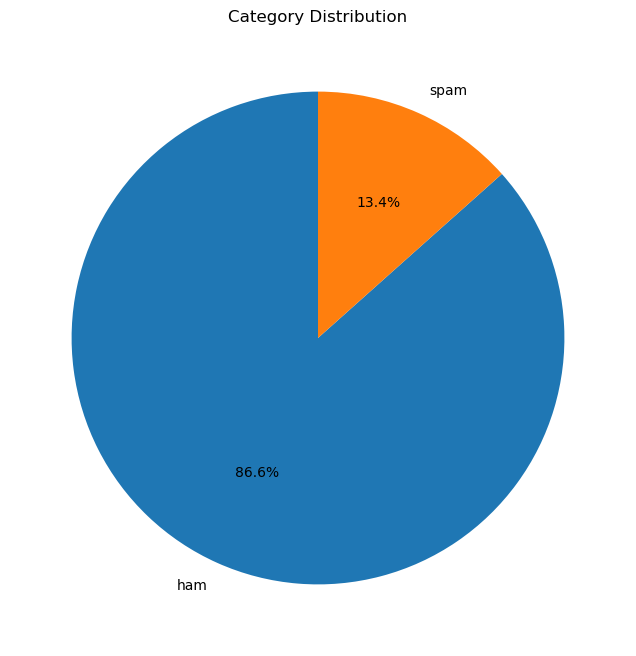

In [36]:
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
plt.figure(figsize=(8, 8))
plt.pie(category_counts['Count'], labels=category_counts['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Category Distribution')

# Create a binary label for spam (1) and not spam (0)

In [37]:
data['spam'] = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)
data

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


# Split the dataset into training and testing sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['spam'], test_size=0.2)

# Initialize CountVectorizer for text feature extraction

In [39]:
featurer = CountVectorizer()

# Transform training data

In [40]:
X_train_count = featurer.fit_transform(X_train.values)

# Initialize Multinomial Naive Bayes model

In [41]:
model = MultinomialNB()

# Fit the model on training data

In [42]:
model.fit(X_train_count, y_train)

MultinomialNB()

# Evaluate the model on the testing set

In [43]:
X_test_count = featurer.transform(X_test)
accuracy = model.score(X_test_count, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9892


# Create a pipeline for simplicity

In [44]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Fit the pipeline on training data

In [45]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

# Evaluate the pipeline on the testing set

In [46]:
accuracy_pipeline = clf.score(X_test, y_test)
print(f"Pipeline Accuracy: {accuracy_pipeline:.4f}")

Pipeline Accuracy: 0.9892


# Example sentences for prediction

In [47]:
new_sentences = [
    "Get a free iPhone now!",  # Expected: Spam
    "Hello, how are you?"  # Expected: Not Spam
]

# Transform new sentences using the same vectorizer

In [48]:
new_sentences_count = featurer.transform(new_sentences)

# Predict whether each sentence is spam (1) or not (0)

In [49]:
predictions = model.predict(new_sentences_count)

# Display predictions

In [50]:
for sentence, prediction in zip(new_sentences, predictions):
    category = " is spam" if prediction == 1 else " is not spam"
    print(f"Message: {sentence}\nPrediction: {category}\n")

Message: Get a free iPhone now!
Prediction:  is spam

Message: Hello, how are you?
Prediction:  is not spam

